# Bank Marketing Campaign

### Created by: Eddy Jusuf

### Business Problem 

Context

Sebuah bank ingin meluncurkan produk finansial baru dengan menggunakan strategi baru marketing campaign. Salah satu produk finansial yang akan dluncurkan berupa term-deposit (atau yang kita kenal sebagai deposito). Deposito tersebut berupa produk yang memberikan bunga (fix interest) yang akan dibayarkan pada tempo-tempo tertentu dengan bunga yang berbeda-beda berdasarkan jangka waktu tempo yang ditetapkan.

Bank tersebut ingin menganalisa data-data yang terkumpul sewaktu berlangsungnya marketing campaign dan ingin memfokuskan target-target customer berdasarkan profil dan marketing data yang di collect dari campaign tersebut. Sehingga dengan adanya analisa tambahan terserbut diharapkan biaya marketing akan bisa lebih ditekan dengan fokus terhadap demographic target customernya.

Target:
- 0 : Tidak membuka Deposito
- 1 : Membuka Deposito


Problem Statement:

Biaya untuk marketing campaign adalah suatu resources yang terbatas, tentu bank ingin meningkatkan efisiensi dalam pembiayaan ke demographic calon-calon customer yang berpotensi membuka deposito. Jika tanpa melakukan perdiksi dengan machine learning dan biaya marketing campaign di gunakan tanpa sasaran yang jelas, maka resources terbatas tersebut akan terbuang dengan percuma.

Goals:

Untuk mengatasi masalah tersebut, bank ingin memiliki kemampuan untuk memperediksi sektor-sektor atau sasaran mana yang jelas dimana biaya marketing campaign akan diinvestikasikan.

Sektor-sektor / Sasaran calon potensi customer yang akan membuka deposito (term deposits) dapat lihat profil customer eg. age (umur), job (pekerjaan), balance (saldo tabungan), housing (memiliki rumah), loan (adanya pinjaman). 

Diharapkan juga Marketing data yang dicollect dari campaign ini juga dapat membantu machine learning algorithm untuk mengidentifikasikan pola dan melakukan prediksi. Data-data tersebut antara lain: contact (tipe kontak), month (bulan kontak terakhir), campaign (jumlah kontak yang dilakukan terhadap customer tersebut), pdays (jumlah hari dari kontak terakhir), poutcome (previous outcome - hasil dari marketing campaign sebelumnya), deposit (pembukaan deposito).

Analytic Approach:

Project ini akan terbagi dalam tahap-tahap berikut:
- Load & Explore Data
- Data Understanding
- Data Cleaning (EDA)
- Split Train/Test
- Preprocessing
- Modelling
- Evaluation
- Hyperparameter Tuning
- Confusion Matrix
- Feature Importance
- Model Deployment

Sangat diharapkan model yang telah dibuat dapat meminimalisasi False Positive (Menekan biaya marketing yang terbuang sia-sia) dan False Negative (Kehilangan sumber deposito). Metric yang akan digunakan antara lain roc_auc/ pr_auc.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

# Metric
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, make_scorer, fbeta_score
# from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score, precision_recall_curve
from scipy.stats import randint, uniform
from scipy.stats import kruskal, mannwhitneyu

# pickle
import pickle
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


### Data 

Dataset source: https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW

Dataset berisi informasi sebagai berikut:

Features 

Customer profile
-	age (umur)
-	job (pekerjaan)
-	balance (saldo tabungan)
-	housing (memiliki rumah)
-	loan (adanya pinjaman)

Marketing data
-	contact: Contact communication type. (Tipe kontak komunikasi)
-	month: Last contact month of the year. (Kontak terakhir dalam tahun ini)
-	campaign: Number of contacts performed during this campaign and for this client. (Jumlah kontak dalam kampanye ini pada client tersebut)
-	pdays: Number of days after the client was contacted from the previous campaign. (Jumlah hari setelah dilakukan kontak dari kampanye sebelumnya)
-	poutcome: Outcome of the previous marketing campaign. (Hasil dari kampanye sebelumnya)
-	deposit: Whether the customer deposits or not. (Dibukanya deposito atau tidak)



### Load & Explore Data

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Purwadhika\Project Capstone Module 3\Datasets for Students\Classification\Bank Marketing Campaign\data_bank_marketing_campaign.csv')
print(df.shape)
df.head()

(7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [3]:
df.info() 
# Bisa dilihat kolom Numerikal antara lain: age, balance, campaign, pdays
# Dan kolom kategorikal antara lain: job, housing, loan, contact, month, poutcome dan deposit 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [4]:
df.describe(include='all')

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
count,7813.000000,7813,7813.000000,7813,7813,7813,7813,7813.000000,7813.000000,7813,7813
unique,NaN,12,NaN,2,2,3,12,NaN,NaN,4,2
top,NaN,management,NaN,no,no,cellular,may,NaN,NaN,unknown,no
freq,NaN,1792,NaN,4140,6789,5628,1976,NaN,NaN,5819,4081
mean,41.257264,NaN,1512.448611,NaN,NaN,NaN,NaN,2.519775,51.408550,NaN,NaN
std,11.919710,NaN,3089.291831,NaN,NaN,NaN,NaN,2.727001,108.072739,NaN,NaN
min,18.000000,NaN,-6847.000000,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN
25%,32.000000,NaN,127.000000,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN
50%,39.000000,NaN,549.000000,NaN,NaN,NaN,NaN,2.000000,-1.000000,NaN,NaN
75%,49.000000,NaN,1684.000000,NaN,NaN,NaN,NaN,3.000000,40.000000,NaN,NaN


In [5]:
# Terdapat 8 baris data duplicate.

df.duplicated().sum()

np.int64(8)

In [6]:
# Data duplicate di drop

df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['deposit'].value_counts()

deposit
no     4075
yes    3730
Name: count, dtype: int64

In [9]:
# balance data (data cukup seimbang No:52.2% vs Yes: 47.7%) - Tidak perlu penanganan SMOTE, RandomOverSampler, RandomUnderSampler.

df['deposit'].value_counts()/len(df)*100

deposit
no     52.210122
yes    47.789878
Name: count, dtype: float64

In [10]:
df.isna().sum() # Tidak ada NaN, tidak perlu melakukan data imputer.

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [11]:
df.isnull().sum() # Tidak ada Null, tidak perlu melakukan data imputer.

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [12]:
# target: deposit --> no mejadi '0' dan yes menjadi '1'
df['deposit'] = np.where(df['deposit']=='yes',1,0)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


### Pisahkan Features dan Target ( Data Spliting)

In [13]:
# Define X y
X = df.drop(columns='deposit') # Features
y = df['deposit'] # Target

In [14]:
y.nunique()

2

In [15]:
y.value_counts()

deposit
0    4075
1    3730
Name: count, dtype: int64

In [16]:
X.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome'],
      dtype='object')

### Train-test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0, stratify=y)
# menggunakan Stratify agar data test dan data train proporsinya tetap sama

### Data Preparation

In [18]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


In [19]:
X.nunique()

age           75
job           12
balance     3153
housing        2
loan           2
contact        3
month         12
campaign      32
pdays        422
poutcome       4
dtype: int64

Pada tahap ini kita akan melakukan feature encoding untuk data2 kategorikal yang kita miliki. Yang akan dilakukan adalah:
- job : menggunakan One Hot Encoder, karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique data yang sedikit
- housing : menggunakan One Hot Encoder, karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique data yang sedikit
- loan : menggunakan One Hot Encoder, karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique data yang sedikit
- contact : menggunakan One Hot Encoder, karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique data yang sedikit
- month : menggunakan One Hot Encoder, karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique data yang sedikit (Tidak digunakannya Binary Coder karena jumlah kategori < 20 dan lebih mudah di-interpretasikan kolomnya dengan One Hot Encoder)
- poutcome : menggunakan One Hot Encoder, karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique data yang sedikit

In [20]:
# Kolom numerical
num_features = X.describe().columns
num_features

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

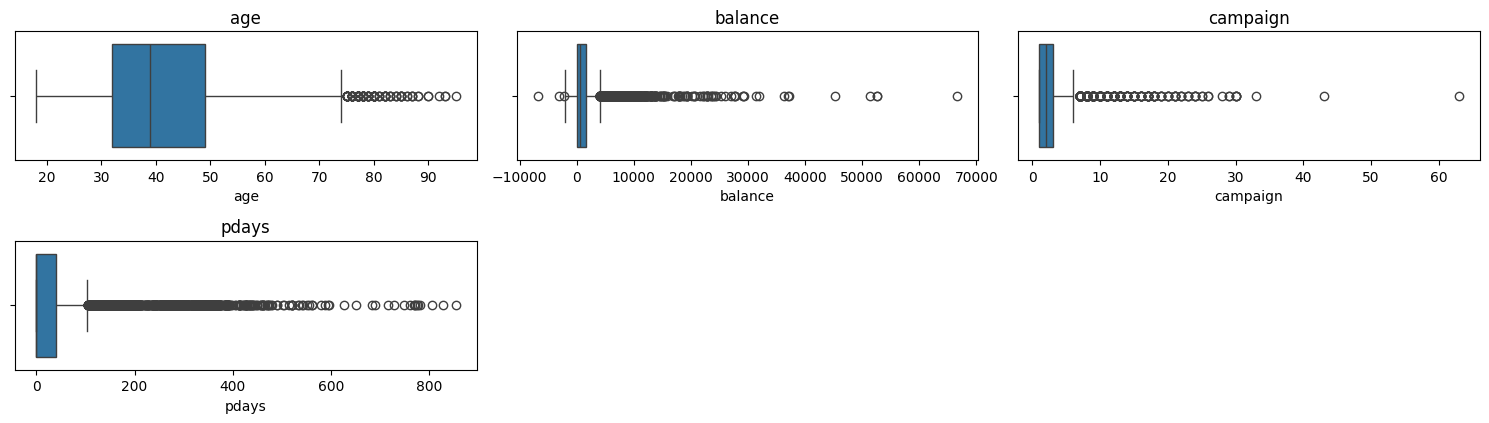

In [21]:
plotnumber = 1
plt.figure(figsize=(15,6))
for kolom in num_features:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)
    plt.tight_layout()
    plotnumber +=1

In [22]:
df.shape

(7805, 11)

In [23]:
df['poutcome'].value_counts()

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64

### Data Preprocessing

Encoding:
- OneHotEncoder: job, housing, loan, contact, month, poutcome (OneHotEncoder untuk data kategorikal)

Scaling:
- RobustScaler: age, balance, campaign, pdays (Memakai RobustScaler karena dalam data tesebut terlihat banyak outliers, jadi tidak menggunakan StandardScaler)

In [24]:
# Preprocessing Pipeline

preprocessor = ColumnTransformer([
    ('kategorikal', OneHotEncoder(drop='first'),['job','housing','loan','contact','month','poutcome']),
    ('numerikal', RobustScaler(), ['age','balance','campaign','pdays'])
], remainder = 'passthrough')

preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('kategorikal', OneHotEncoder(drop='first'),
                                 ['job', 'housing', 'loan', 'contact', 'month',
                                  'poutcome']),
                                ('numerikal', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

In [25]:
# Define Model to Compare (Basic ML Algorithm)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42), # Model dasar yang interpretable dan linear.
    'KNN': KNeighborsClassifier(), # Model yang mengklasifikasikan berdarsarkan tetangga terdekat pada feature.
    'Decision Tree': DecisionTreeClassifier(random_state=42), # Model pohon yang membagi data berdasarkan fitur penting.
    'Random Forest': RandomForestClassifier(random_state=42), # Model kumpulan ensemble banyak decision tree.
    'Gradient Boosting': GradientBoostingClassifier(random_state=42), # Membangun model secara bertahap (boosting), setiap pohon memperbaiki dari kesalahan pohon sebelumnya.
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'), # Versi boosting yang lebih cepat & efisien dari Gradient Boosting
    'LightGBM': LGBMClassifier(random_state=42) # Model algoritma boosting ringan dan sangat cepat, bagus untuk dataset besar (Menggunakan historgram-based splitting)
}

In [26]:
# Evaluasi Test Set

results_before = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Fitting 
    pipe.fit(X_train, y_train)
  
    # Predict ke data set
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    
    results_before.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred), # Presentase prediksi benar secara menyeluruh.
        'Precision': precision_score(y_test, y_pred), # Ketepatan prediksi positif (hindari False Positives)
        'Recall': recall_score(y_test, y_pred), # Kemampuan menangkap calon nasabah deposito (hindari False Negatives)
        'F1-Score': f1_score(y_test, y_pred), # Keseimbangan antara Precision & Recall
        'ROC_AUC': roc_auc_score(y_test, y_prob), # Kemampuan membedakan kelas deposit vs tidak
        'PR_AUC': average_precision_score(y_test, y_prob) # Area Under Precision–Recall Curve 
    })


results_before = pd.DataFrame(results_before).sort_values(by="ROC_AUC", ascending=False)
print("=== HASIL SEBELUM GRIDSEARCH ===")
display(results_before)



[LightGBM] [Info] Number of positive: 2984, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 6244, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477899 -> initscore=-0.088463
[LightGBM] [Info] Start training from score -0.088463
=== HASIL SEBELUM GRIDSEARCH ===


,Model,Accuracy,Precision,Recall,F1-Score,ROC_AUC,PR_AUC
4,Gradient Boosting,0.716848,0.762976,0.591153,0.666163,0.770844,0.779426
6,LightGBM,0.709161,0.739344,0.604558,0.665192,0.762020,0.773059
0,Logistic Regression,0.696989,0.729412,0.581769,0.647278,0.754197,0.765281
5,XGBoost,0.702114,0.721959,0.612601,0.662799,0.750203,0.754128
3,Random Forest,0.698270,0.706147,0.631367,0.666667,0.745255,0.758765
1,KNN,0.659193,0.657353,0.599196,0.626928,0.697096,0.669753
2,Decision Tree,0.636771,0.617918,0.628686,0.623256,0.636201,0.565927


- Dari data diatas sebelum Hyperparameter tuning terlihat model dengan ROC_AUC dan PR_AUC score terbaik adalah Gradient Boosting (0.770844,0.779426) dan LightBGM (0.762020, 0.773059)
- Sedangkan model terburuk adalah KNN (0.697096,0.669753) dan Decision Tree (0.636201, 0.565927).


=== Confusion Matrix Sebelum Tuning ===
[LightGBM] [Info] Number of positive: 2984, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 6244, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477899 -> initscore=-0.088463
[LightGBM] [Info] Start training from score -0.088463


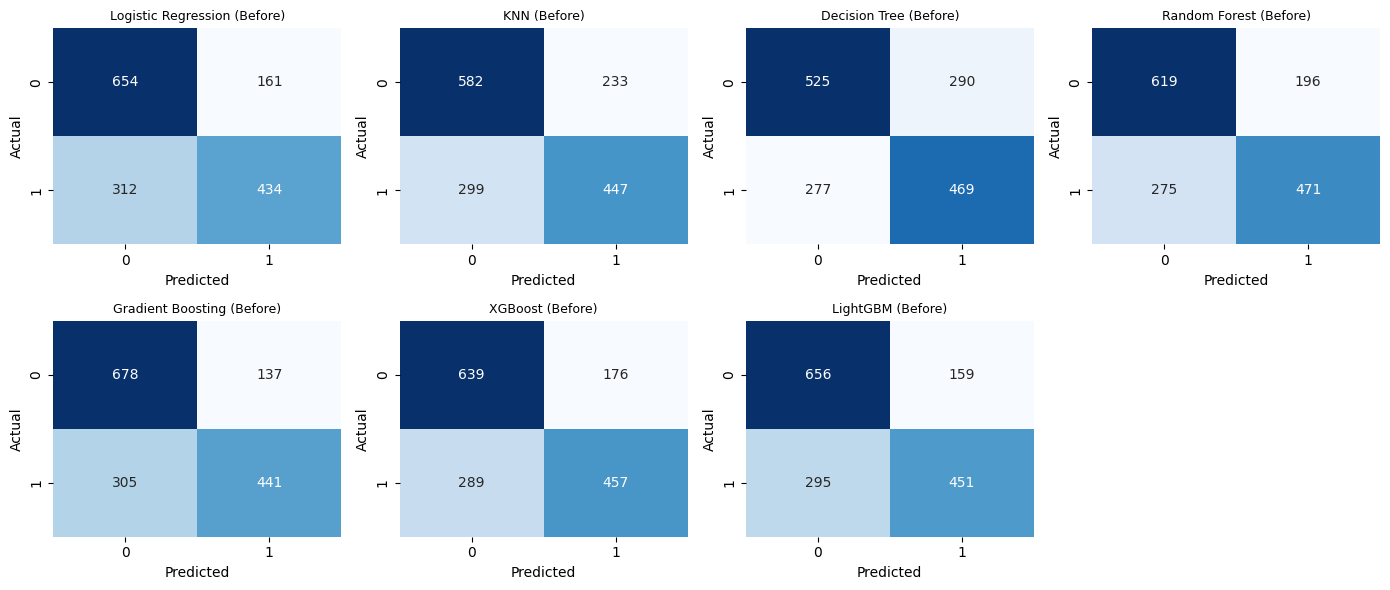

In [27]:

# Confusion Matrix Before Tuning
print("=== Confusion Matrix Sebelum Tuning ===")
plt.figure(figsize=(14, 6))

for i, (name, model) in enumerate(models.items()):
    pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, (len(models)+1)//2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} (Before)", fontsize=9)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
plt.tight_layout()
plt.show()


### Hasil dari Confusion Matrix sebelum Hyperparameter Tuning:
- Yang memiliki TN tertinggi: Gradient Boosting, LightGBM dan Logistic Regression sesuai dengan ROC_AUC scorenya.
- Yang memiliki TP tertinggi: Random Forest, Decision Tree, XG Boost.
- Yang memiliki FN tertinggi: Logistic Regression, Gradient Boosting, KNN.
- Yang memiliki FP terendah: Gradient Boosting, LightGBM, Logistic Regression.

# Hyperparameter Tuning

In [28]:
# GridsearchCV Parameter


param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10],  # Invers regularization strength, 0.001-0.01 regulasi kuat, 0.1-1 regulasi sedang, 10 regulasi lemah
        'model__solver': ['liblinear', 'lbfgs'] # Algoritma Optimasi, liblinear: dataset kecil-menengah, lbfgs dataset besar, fitur banyak.
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7, 9], 
        # n_neighbors 3 - Nilai kecil - model kompleks/sensitif, 5-9 - Nilai Sedang - model seimbang. 
        # Akan dibandingkan semua skor dan pilih k terbaik.
        'model__weights': ['uniform', 'distance']
        # parameter weights di KNN, 'uniform' semua tetangga dihitung dengan pengaruh yang sama besar, 
        # 'distance' tetangga yang lebih dekat memiliki bobot lebih besar
    },
    'Decision Tree': {
        'model__max_depth': [3, 5, 10, None], # Melihat kedalaman pohon dari 3 level sampai ke tingkat None (tidak terbatas), idealnya di level 5.
        'model__min_samples_split': [2, 5, 10] 
        # menentukan berapa banyak data minimum yang harus dimiliki sebuah node sebelum dipecah lagi. 
        # Biasanya di nilai 5 jadi tidak resiko overfit atau underfit.
    },
    'Random Forest': {
        'model__n_estimators': [50, 100], 
        # jumlah pohon keputusan (decision trees), nilai 50 kecil - cepat dilatih tapi kurang stabil.
        # Sedang (100-200) - umum hasil terbaik, cukup stabil
        # Besar (>500) - Akurasi bisa sedikit naik tapi waktu training lama
        'model__max_depth': [10, 20, None],
        # menandakan maksimum tiap pohon, 10 - pohon 10 level mencegah overfit, 20 - lebih dalam - resiko overfit meningkat, None - tanpa batas - bisa overfit
        'model__min_samples_split': [2, 10]
        # 2 - default - model lebih flexibel, bisa overfit, 10 - minimal harus ada 10 data untuk split, model lebih sederhana underfit
    },
    'Gradient Boosting': {
        'model__learning_rate': [0.05, 0.1],
        # kontribusi tiap pohon baru terhadap model keseluruhan, kecil (0.01-0.05) model lebih stabil, resiko overfit kecil
        # sedang (0.1) hasil terbaik antara kecepatan dan akurasi
        # besar (>0.3) model lebih cepat belajar, tapi bisa overfit
        'model__n_estimators': [100, 200],
        # pohon kecil (weak learners) yang dibangun secara beruturan, 100 - cepat dilatih, cukup akurat, 200 - lebih banyak pohon tapi butuh waktu lebih lama, 
        # >500 bisa mulaioverfit jika learning rate tidak kecil
        'model__max_depth': [3, 5]
        # Kedalaman setiap pohon kecil di dalam boosting
        # 3 - default, sederhana, cepat dan stabil, 5 - pohon lebih dalam - bisa menangkap fitur yang lebih kompleks, >7 - jarang perlu bisa overfit
    },
    'XGBoost': {
        'model__learning_rate': [0.05, 0.1],
        # seberapa cepat model belajar, 0.05 - pelan tapi stabil, aman dari overfit, 0.1 - efek sedang - cepat belajar, sering jadi default terbaik, 
        # >0.3 - terlalu cepat, model bisa overfit
        'model__max_depth': [3, 5],
        # seberapa dalam tiap pohon
        # nilai 3 - dangkal - pohon sederhana, model general, risiko underfit kecil, 5 - lebih dalam - bisa tangkap pola kompleks, 
        # >7 - sangat dalam - biasanya overfit, jarang perlu
        'model__colsample_bytree': [0.8, 1.0]
        # proporsi fitur yang diambil tiap pohon
        # 1.0 - gunakan semua fitur, akurasi tinggi tapi bisa overfit, 0.8 - gunakan 80% dari fitur, lebih variasi, mengurangi overfitting, <0.8 kurang fitur, bisa underfit
    },
    'LightGBM': {
        'model__learning_rate': [0.05, 0.1],
        # seberapa cepat model belajar, 0.05 - pelan tapi stabil, aman dari overfit, 0.1 - efek sedang - cepat belajar, sering jadi default terbaik, 
        # >0.3 - terlalu cepat, model bisa overfit
        'model__num_leaves': [31, 50],
        # Jumlah maksimum daun per pohon
        # 31 - default - pohon sederhana, 50 - lebih banyak daun - bisa tangkap pola rumit tapi resiko overfit, >100 - sangat kompleks, bisa overfit
        'model__max_depth': [-1, 5, 10]
        # seberapa dalam tiap pohon
        # nilai 3 - dangkal - pohon sederhana, model general, risiko underfit kecil, 5 - lebih dalam - bisa tangkap pola kompleks, 
        # >7 - sangat dalam - biasanya overfit, jarang perlu
        
    }
}

In [29]:
# GridsearchCV Tuning

results_grid = []
best_models = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)

    # Fitting
    grid.fit(X_train, y_train)

    # Simpan pipeline + model
    best_models[name] = grid.best_estimator_
    
    # Predict ke Data Set
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]
    
    results_grid.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_prob),
        'PR_AUC': average_precision_score(y_test, y_prob)
    })

results_grid = pd.DataFrame(results_grid).sort_values(by="ROC_AUC", ascending=False)
print("=== HASIL SESUDAH GRIDSEARCH ===")
display(results_grid)


[LightGBM] [Info] Number of positive: 2984, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 6244, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477899 -> initscore=-0.088463
[LightGBM] [Info] Start training from score -0.088463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,Best Params,Accuracy,Precision,Recall,F1-Score,ROC_AUC,PR_AUC
4,Gradient Boosting,"{'model__learning_rate': 0.05, 'model__max_dep...",0.719411,0.765517,0.595174,0.669683,0.772669,0.781046
5,XGBoost,"{'model__colsample_bytree': 0.8, 'model__learn...",0.714926,0.756388,0.595174,0.666167,0.771828,0.778062
3,Random Forest,"{'model__max_depth': 10, 'model__min_samples_s...",0.710442,0.750853,0.589812,0.660661,0.771379,0.774689
6,LightGBM,"{'model__learning_rate': 0.05, 'model__max_dep...",0.709161,0.751724,0.584450,0.657617,0.767472,0.774214
0,Logistic Regression,"{'model__C': 0.1, 'model__solver': 'liblinear'}",0.694427,0.716586,0.596515,0.651061,0.755109,0.765696
2,Decision Tree,"{'model__max_depth': 10, 'model__min_samples_s...",0.692505,0.719472,0.584450,0.644970,0.745095,0.715440
1,KNN,"{'model__n_neighbors': 9, 'model__weights': 'u...",0.686739,0.692654,0.619303,0.653928,0.730906,0.711478


# Hasil sesudah Tuning GridsearchCV
- Dari data diatas sebelum Hyperparameter tuning (GridsearchCV) terlihat model dengan ROC_AUC dan PR_AUC score terbaik adalah Gradient Boosting (0.772669,0.781046) dan XGBoost (0.771828, 0.778062)
- Sedangkan model terburuk adalah Decision Tree (0.745095, 0.715440) dan KNN (0.730906, 0.711478).

=== Confusion Matrix Sesudah Tuning ===


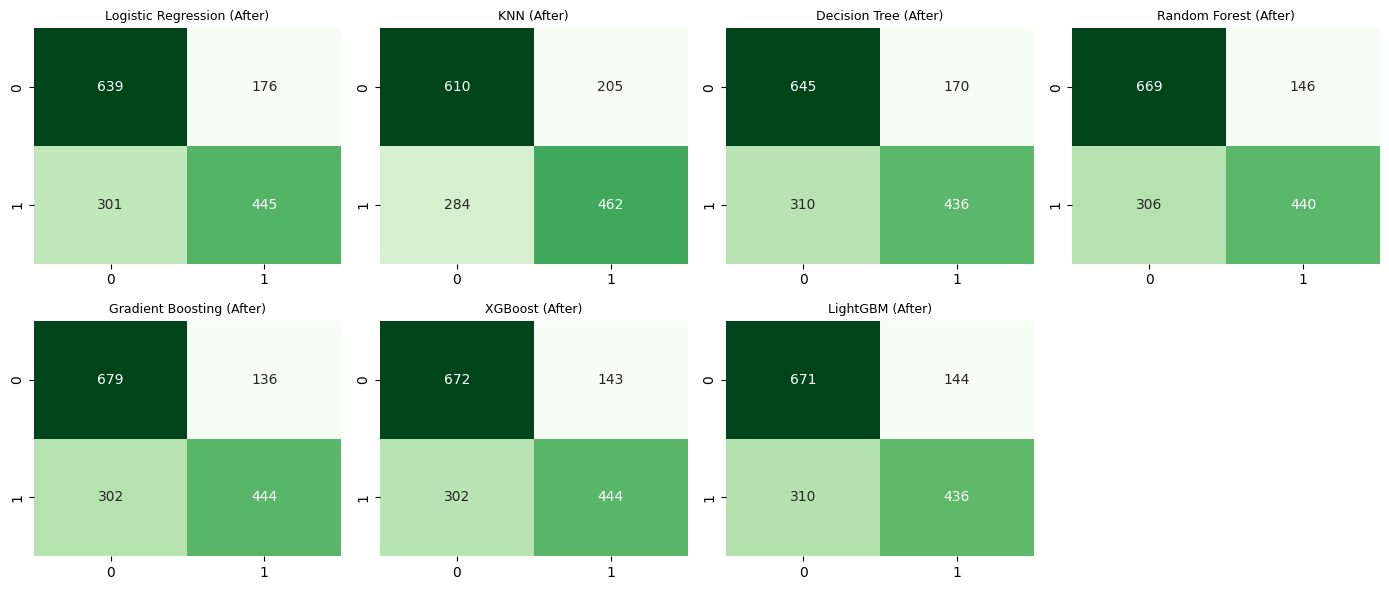

In [30]:
# Confusion Matrix Sesudah Tuning
print("=== Confusion Matrix Sesudah Tuning ===")
plt.figure(figsize=(14, 6))


for i, (name, pipe) in enumerate(best_models.items()):
    # Tidak perlu di fit ulang karena setiap pipline di best_models sudah di-fit saat GridsearchCV
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, (len(best_models) + 1) // 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f"{name} (After)", fontsize=9)
plt.tight_layout()
plt.show()

### Hasil dari Confusion Matrix sebelum Hyperparameter Tuning:
- Yang memiliki TN tertinggi: Gradient Boosting, LightGBM dan Logistic Regression sesuai dengan ROC_AUC scorenya.
- Yang memiliki TP tertinggi: Random Forest, Decision Tree, XG Boost.
- Yang memiliki FN tertinggi: Logistic Regression, Gradient Boosting, KNN.
- Yang memiliki FP terendah: Gradient Boosting, LightGBM, Logistic Regression.


### Hasil dari Confusion Matrix sesudah Hyperparameter Tuning:
- Yang memiliki TN tertinggi: Gradient Boosting, XGBoost dan LightGBM sesuai dengan ROC_AUC scorenya.
- Yang memiliki TP tertinggi: KNN, Logistic Regression, Gradient Boosting, XGBoost.
- Yang memiliki FN tertinggi: Decision Tree, LightGBM, Random Forest.
- Yang memiliki FP terendah: Gradient Boosting, LightGBM, Random Forest.



In [31]:
# RandomizedSearchCV Parameter


param_dists = {
    'Logistic Regression': {
        'model__C': uniform(0.01, 10),
        'model__solver': ['liblinear', 'lbfgs']
    },
    'KNN': {
        'model__n_neighbors': randint(3, 15),
        'model__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'model__max_depth': randint(2, 15),
        'model__min_samples_split': randint(2, 10)
    },
    'Random Forest': {
        'model__n_estimators': randint(100, 300),
        'model__max_depth': randint(3, 15),
        'model__min_samples_split': randint(2, 10)
    },
    'Gradient Boosting': {
        'model__learning_rate': uniform(0.01, 0.2),
        'model__n_estimators': randint(100, 300),
        'model__max_depth': randint(2, 10)
    },
    'XGBoost': {
        'model__learning_rate': uniform(0.01, 0.2),
        'model__max_depth': randint(2, 10),
        'model__colsample_bytree': uniform(0.7, 0.3)
    },
    'LightGBM': {
        'model__learning_rate': uniform(0.01, 0.2),
        'model__num_leaves': randint(20, 80),
        'model__max_depth': randint(-1, 10)
    }
}

In [32]:
results_random = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    rand = RandomizedSearchCV(pipe, param_dists[name], n_iter=10, cv=5,
                              scoring='roc_auc', random_state=42, n_jobs=-1)
    
    # Fitting
    rand.fit(X_train, y_train)
    best_model = rand.best_estimator_

    # Predict ke Data Set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    results_random.append({
        'Model': name,
        'Best Params': rand.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_prob),
        'PR_AUC': average_precision_score(y_test, y_prob)
        
    })

results_random = pd.DataFrame(results_random).sort_values(by="ROC_AUC", ascending=False)
print("=== HASIL SESUDAH RANDOMIZED SEARCH ===")
display(results_random)

[LightGBM] [Info] Number of positive: 2984, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 6244, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477899 -> initscore=-0.088463
[LightGBM] [Info] Start training from score -0.088463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,Best Params,Accuracy,Precision,Recall,ROC_AUC,PR_AUC
3,Random Forest,"{'model__max_depth': 13, 'model__min_samples_s...",0.714926,0.748760,0.607239,0.772271,0.777943
5,XGBoost,{'model__colsample_bytree': 0.8835558684167137...,0.709801,0.755672,0.580429,0.770560,0.776623
6,LightGBM,"{'model__learning_rate': 0.18323522915498705, ...",0.709161,0.752595,0.583110,0.769887,0.776515
4,Gradient Boosting,"{'model__learning_rate': 0.0412037280884873, '...",0.713004,0.756014,0.589812,0.768379,0.777453
0,Logistic Regression,"{'model__C': 0.5741157902710026, 'model__solve...",0.696989,0.727880,0.584450,0.754491,0.765445
1,KNN,"{'model__n_neighbors': 12, 'model__weights': '...",0.695708,0.742397,0.556300,0.737328,0.721325
2,Decision Tree,"{'model__max_depth': 8, 'model__min_samples_sp...",0.682255,0.744141,0.510724,0.731042,0.705014


# Hasil sebelum Tuning
- Dari data diatas sebelum Hyperparameter tuning terlihat model dengan ROC_AUC dan PR_AUC score terbaik adalah Gradient Boosting (0.770844,0.779426) dan LightBGM (0.762020, 0.773059)
- Sedangkan model terburuk adalah KNN (0.697096,0.669753) dan Decision Tree (0.636201, 0.565927).


# Hasil sesudah Tuning GridsearchCV
- Dari data diatas sebelum Hyperparameter tuning (GridsearchCV) terlihat model dengan ROC_AUC dan PR_AUC score terbaik adalah Gradient Boosting (0.772669,0.781046) dan XGBoost (0.771828, 0.778062)
- Sedangkan model terburuk adalah Decision Tree (0.745095, 0.715440) dan KNN (0.730906, 0.711478).


# Hasil sesudah Tuning RandomizesearchCV
- Dari data diatas sebelum Hyperparameter tuning (GridsearchCV) terlihat model dengan ROC_AUC dan PR_AUC score terbaik adalah Random Forest (0.772271,0.777943) dan XGBoost (0.770560, 0.776623)
- Sedangkan model terburuk adalah KNN (0.737328, 0.721325) dan Decision Tree (0.731042, 0.705014).


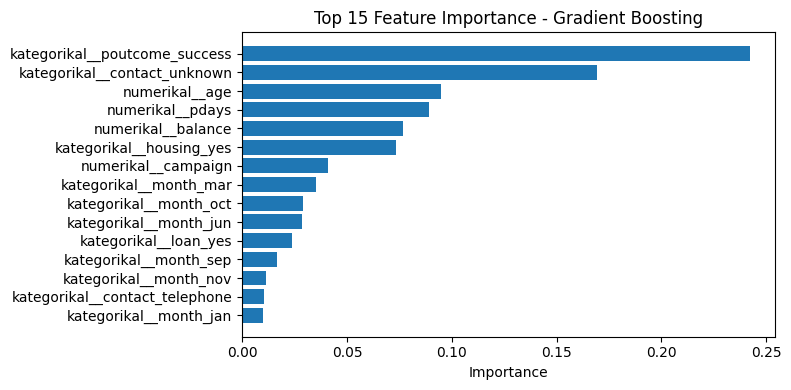

In [33]:
# Feature Importance

# Gabungkan Pipeline + Best Model
best_model_name = 'Gradient Boosting'
best_pipe = best_models[best_model_name]
best_model = best_pipe.named_steps['model']

# Ambil nama feature_name hasil preprocessing
feature_names = preprocessor.get_feature_names_out()

# Ambil feature_importance
importances = best_model.feature_importances_


# Tampilkan top 15 kategori terpenting
indices = np.argsort(importances)[::-1][:15]
plt.figure(figsize=(8, 4))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.title(f"Top 15 Feature Importance - {best_model_name}")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



In [34]:
print(type(best_models[best_model_name]))


<class 'imblearn.pipeline.Pipeline'>


- Dari Feature Importance bisa dilihat feature kategorikal_poutcome_success dan kategorikal_contact_unknown adalah feature-feature yang mempengaruhi kesuksesan pembukaan deposit.
- Untuk Feature Numerikal: age, pdays dan balance.

### Deployment

Save Model

In [35]:
best_models[best_model_name]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('kategorikal',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('numerikal', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200,
                                            random_state=42))])

In [36]:
# Save Model: Simpan Pipeline + Best Model ke Pickle

filename = 'Gradient_Boosting_pipeline.pkl'

pickle.dump(best_pipe,open(filename,'wb'))


In [37]:
# Load Model

loaded_model = pickle.load(open(filename,'rb'))

loaded_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('kategorikal',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('numerikal', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200,
                                            random_state=42))])

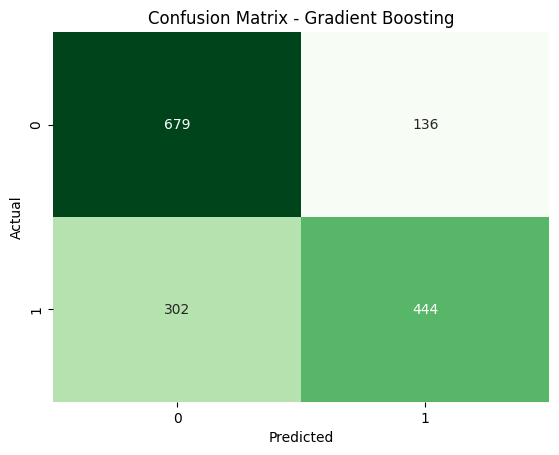

In [38]:
# Load pipeline & Evaluasi dari Confusion Matrix

y_pred = loaded_model.predict(X_test)
y_prob = loaded_model.predict_proba(X_test)[:, 1]

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Dari hasil Confusion Matrix diatas dapat disimpulkan:
- True Negative - 679 - Model mampu mengidentifikasi nasabah yang tidak benar - benar melakukan deposit.
- True Positive - 444 - Model mampu mengidentifikasi nasabah yang benar - benar melakukan deposit.
- False Negative - 302 - Calon potensi nasabah yang terlewatkan untuk membuka deposit.
- False Positive - 136 - Angka terkecil menandakan precision yang cukup tinggi dalam mengidentifikasikan nasabah yang tidak deposit sebagai calon deposit.


In [39]:
# Prediksi Data Baru ke Pickle
data_baru = pd.DataFrame({
    'age':[70],
    'job':['admin.'],
    'marital':['married'],
    'education':['tertiary'],
    'default':['no'],
    'balance':[12000],
    'housing':['yes'],
    'loan':['no'],
    'contact':['unknown'],
    'day':[15],
    'month':['aug'],
    'duration':[210],
    'campaign':[1],
    'pdays':[10],
    'previous':[0],
    'poutcome':['unknown']
})


pred_class = loaded_model.predict(data_baru)[0]
pred_prob = loaded_model.predict_proba(data_baru)[:, 1][0]

print("\n=== PREDIKSI DATA BARU ===")
print(f"Prediksi kelas: {pred_class}")
print(f"Probabilitas deposit YES: {pred_prob:.4f}")
print("Pelanggan diprediksi AKAN melakukan deposit." if pred_class == 1 else "Pelanggan diprediksi TIDAK akan melakukan deposit.")


=== PREDIKSI DATA BARU ===
Prediksi kelas: 0
Probabilitas deposit YES: 0.3193
Pelanggan diprediksi TIDAK akan melakukan deposit.


In [40]:
# Prediksi Data Baru ke Pickle
data_baru = pd.DataFrame({
    'age':[35],
    'job':['admin.'],
    'marital':['married'],
    'education':['tertiary'],
    'default':['no'],
    'balance':[1200],
    'housing':['yes'],
    'loan':['no'],
    'contact':['cellular'],
    'day':[15],
    'month':['aug'],
    'duration':[210],
    'campaign':[1],
    'pdays':[999],
    'previous':[0],
    'poutcome':['unknown']
})

pred_class = loaded_model.predict(data_baru)[0]
pred_prob = loaded_model.predict_proba(data_baru)[:, 1][0]

print("\n=== PREDIKSI DATA BARU ===")
print(f"Prediksi kelas: {pred_class}")
print(f"Probabilitas deposit YES: {pred_prob:.4f}")
print("Pelanggan diprediksi AKAN melakukan deposit." if pred_class == 1 else "Pelanggan diprediksi TIDAK akan melakukan deposit.")


=== PREDIKSI DATA BARU ===
Prediksi kelas: 1
Probabilitas deposit YES: 0.8376
Pelanggan diprediksi AKAN melakukan deposit.


### Kesimpulan dan Rekomendasi

Kesimpulan:
- Data Bank Marketing Campaign adalah data dalam bentuk Klasifikasi bukan Regresi. Ini dapat dilihat dari Targetnya yang berupa 0 atau 1. 
- Terdapat 7813 baris data dan 11 kolom.
- Kolom terdiri dari data kategorikal (job, housing, loan, contact, month, campaign, poutcome) dan numerikal (age, balance, campaign dan pdays). 
- Terdapat 8 baris data duplikat yang di drop.
- Untuk Target data cukup seimbang no vs yes 52.2% vs 47.7% jadi tidak perlu SMOTE, RandomOverSampler atau RandomUnderSampler.
- Tidak terdapat data Null atau NaN jadi tidak perlu melakukan data imputer.
- Untuk data preprocessing, untuk data kategorikal akan di gunakan OneHotEncoder. Karena dilihat datanya tidak berurutan maka tidak digunakannya Ordinal Encoder. Binary Encoder juga tidak digunakan karena jumlah kategori < 20. 
- Sedangkan pada kolom numerikal terilhat memiliki outlier dan tidak berbentuk normal. Oleh sebab itu kolom numerikal akan diterapkan RobustScaler daripada StandardScaler.
- Beberapa model dilakukan sebelum dan sesudah Hyperparameter Tuning dan terlihat Gradient Boosting memiliki ROC_AUC dan PR_AUC score yang terbaik. Terlihat juga dari Confusion Matrix, Gradient Boosting terlihat memiliki prediksi yang terbaik dibanding model-model lainnya.
- Ini dikarenakan Gradient Boosting secara teori membangun banyak pohon secara bertahap (boosting) dan memperbaiki error sebelumnya. Kalau dibanding Logistic Regression yang menekankan model linear dan perlu membuat fitur tambahan. Untuk KNN sangat bergantung kepada jarak dan sulit menerapkan data OneHotEncoder. Untuk Decision Tree bisa diterapkan non-linear namun resiko mengalami overfitting. Untuk Random Forest juga kurang stabil pada pola-pola rumit sedangkan XGBoost / LightGBM sangat sensitif terhadap hypermeter & ukuran data. Maka untuk data yang terlampir Gradient Boosting unggul dan dan stabil pada dataset kecil-menengah.
- Dari hasil Feature Importances, terlihat feature kategorikal poutcome, contact mempunyai pengaruh paling besar terhadap prediksi deposit. Untuk feature numerikal, age, pdays dan balance mempunyai pengaruh paling besar terhadap prediksi deposit.
- Dengan digunakannya Gradient Boosting Model (TP: 679, TN: 444, FN: 302 dan FP: 136), dapat dilihat jika perusahaan finansial ini, seumpama menggunakan model ini dapat menghemat biaya marketing terhadap TN + FN: 746 nasabah dan hanya fokus kepada TP + FP : 815 nasabah. Penghematan sebesar (745/1561) = 47.7%
- Pipeline disimpan dalam file pickle terdapat fungsi pipeline dan model sehingga data test dapat di upload langsung tanpa perlu di encoding terlebih dahulu.
- Kesimpulan untuk bisnis, jika dilihat dari model Gradient Boosting ini sudah menunjukkan keseimbangan yang baik antara Precision dan Recall. Model ini juga dilihat sudah cukup baik dalam meningkatkan efisiensi dalam biaya campaign (biaya promosi ke nasabah non-deposito).



Rekomendasi:
- Untuk data kategorikal terdapat data Unknown dalam contact, ini mungkin perlu di telusuri alasannya dan diganti sehingga memperbaiki akurasi data.
- Dalam predict_proba kita dapat mengatur probabilitas (default 0.5): < 0.5 lebih rendah - berarti lebih banyak nasabah yang potensial (recall), > 0.5 lebih tinggi - hasil lebih presisi (precision).
- Model-model yang dievaluasi antara lain seperti Decision Tree, Random Forest, Grandient Boosting, XGBoost dan LightGBM dapat bekerja lebih baik jikalau data numerikal di groupby sehingga ordinal encoding dapat diterapkan.
- Dapat juga diterapkan metrik seperti F2-Score yang lebih memberi penekanan pada Recall. Dengan diterapkannya F2-Score diharapkan dapat menekan angka False Negative sehingga dapat menangkap lebih banyak lagi calon-calon nasabah yang berpotensial membuka deposito.

### ******** SEKIAN & TERIMA KASIH ******** 